In [1]:
import numpy as np
import inner_simplex as simplex
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

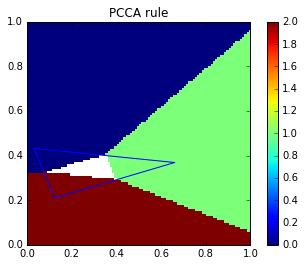

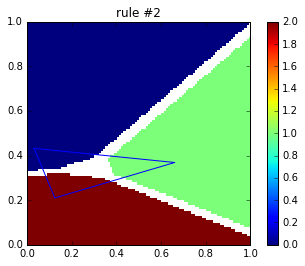

In [3]:
N = 100
o = np.zeros((N,N)) + np.nan
v = np.random.rand(3, 2)

M = np.vstack((v.T, np.ones(v.shape[0]))) # see also inner_simplex.py
lu_and_piv = sp.linalg.lu_factor(M)

f = 0.5

for i,x in enumerate(np.linspace(0, 1.0, N, endpoint=False)):
    for j,y in enumerate(np.linspace(0, 1.0, N, endpoint=False)):
        point = np.array([x,y])
        l = sp.linalg.lu_solve(lu_and_piv, np.concatenate((point, [1])))
        k, k2 = np.argsort(l)[::-1][0:2]
        if l[k] > f: # default rule
            o[i,j] = k

plt.imshow(o.T[::-1], interpolation='nearest', extent=[0.0,1.0,0.0,1.0])
idx = np.array([0,1,2,0], dtype=int)
plt.plot(v[idx, 0], v[idx, 1])
plt.colorbar()
plt.title('PCCA rule')

plt.figure()
o = np.zeros((N,N)) + np.nan
for i,x in enumerate(np.linspace(0, 1.0, N, endpoint=False)):
    for j,y in enumerate(np.linspace(0, 1.0, N, endpoint=False)):
        point = np.array([x,y])
        l = sp.linalg.lu_solve(lu_and_piv, np.concatenate((point, [1])))
        k, k2 = np.argsort(l)[::-1][0:2]
        if l[k] > f and l[k2] < l[k]-.1: # rule #2 (does this work in higher dimensions?)
            o[i,j] = k

plt.imshow(o.T[::-1], interpolation='nearest', extent=[0.0,1.0,0.0,1.0])
idx = np.array([0,1,2,0], dtype=int)
plt.plot(v[idx, 0], v[idx, 1])
plt.colorbar()
plt.title('rule #2')